In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,roc_curve,auc

In [2]:
df=pd.read_csv('survey.csv')

In [54]:
df.tail(20)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1239,30,male,Netherlands,outside_usa,No,No,No,Sometimes,500-1000,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Yes,Yes,Maybe,Yes,Don't know,No
1240,31,male,Germany,outside_usa,No,Yes,Yes,Sometimes,100-500,No,Yes,Don't know,No,No,No,Yes,Somewhat easy,No,No,Some of them,No,No,No,Don't know,No
1241,31,Male,Poland,outside_usa,Yes,No,Yes,Often,6-25,Yes,Yes,No,No,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,No,No,No,Don't know,No
1242,28,Male,Ireland,outside_usa,No,No,Yes,Rarely,26-100,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No
1243,43,f,United States,FL,No,Yes,Yes,Rarely,More than 1000,Yes,Yes,Yes,Yes,No,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
1244,32,female,United Kingdom,outside_usa,No,No,No,Never,More than 1000,No,No,No,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No
1245,22,Male,Australia,outside_usa,No,Yes,Yes,Often,100-500,No,No,Yes,Yes,Yes,Yes,Yes,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes
1246,32,Male,United States,OR,No,No,No,Never,100-500,No,Yes,Yes,Not sure,Don't know,Yes,Don't know,Somewhat easy,No,No,No,Some of them,Maybe,Yes,Don't know,No
1247,36,male,Finland,outside_usa,No,No,Yes,Often,6-25,No,Yes,No,No,No,No,No,Very difficult,Yes,No,Some of them,No,No,Maybe,Don't know,Yes
1248,41,Female,United States,WA,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,No,No,Don't know,Don't know,Don't know,Yes,Maybe,No,No,No,No,Don't know,No


In [5]:
df.shape

(1259, 27)

In [4]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [37]:
df.drop(columns=['Timestamp'],axis=1,inplace=True)

In [40]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [41]:
df['self_employed'].fillna("unknown",inplace=True)

C:\Users\saumya pathak\AppData\Local\Temp\ipykernel_3704\1069525062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna("unknown",inplace=True)


In [42]:
df['state']=df['state'].fillna("outside_usa")

In [43]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [44]:
df["work_interfere"] = df.groupby("treatment")["work_interfere"].transform(lambda x: x.fillna(x.mode()[0]))

In [45]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [46]:
X=df.drop('treatment',axis=1)
Y=df['treatment']

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [81]:
num=X.select_dtypes(include=['number']).columns.to_list()
cat=X.select_dtypes(include=['object','category']).columns.to_list()

In [82]:
preprocessor=ColumnTransformer([
    ('nume',StandardScaler(),num),
    ('cate',OneHotEncoder(handle_unknown='ignore'),cat)
])

In [83]:
pipe=make_pipeline(preprocessor,LogisticRegression())

In [84]:
pipe.fit(X_train,Y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nume', ...), ('cate', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [85]:
Y_pred=pipe.predict(X_test)

In [86]:
print("accuracy_score",accuracy_score(Y_pred,Y_test))

accuracy_score 0.8214285714285714


In [87]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

          No       0.81      0.82      0.82       123
         Yes       0.83      0.82      0.82       129

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252



In [88]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'saga'],
    'logisticregression__max_iter': [100, 200, 500],
    'logisticregression__penalty': ['l2']
}

In [89]:
grid=GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train,Y_train)

c:\Users\saumya pathak\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,Pipeline(step...egression())])
,param_grid,"{'logisticregression__C': [0.01, 0.1, ...], 'logisticregression__max_iter': [100, 200, ...], 'logisticregression__penalty': ['l2'], 'logisticregression__solver': ['lbfgs', 'saga']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('nume', ...), ('cate', ...)]"


In [90]:
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best parameters: {'logisticregression__C': 1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}


In [91]:
Y_grid=grid.predict(X_test)

In [92]:
print(classification_report(Y_grid,Y_test))

              precision    recall  f1-score   support

          No       0.79      0.83      0.81       118
         Yes       0.84      0.81      0.82       134

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252



In [102]:
from sklearn.datasets import make_classification

In [103]:
A,B=make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=2,n_classes=2,weights=[0.6,0.4],random_state=42)
df=pd.DataFrame(A,columns=[f"feature{i}" for i in range(10)])
df["target"]=B

In [104]:
df.head(4)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1


In [105]:
W=df.drop('target',axis=1)
S=df['target']

In [106]:
W_train,W_test,S_train,S_test=train_test_split(W,S,test_size=0.2,random_state=42)

In [107]:
model=LogisticRegression()

In [108]:
model.fit(W_train,S_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [109]:
S_prob=model.predict_proba(W_test)[:,1]

In [110]:
fpr,tpr,thresholds=roc_curve(S_test,S_prob)
roc_auc=auc(fpr,tpr)

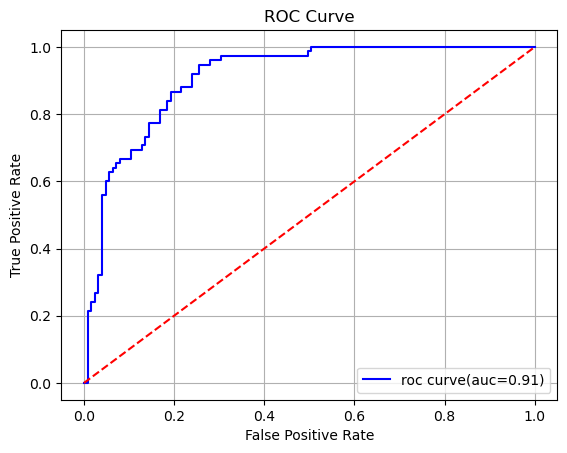

In [112]:
plt.Figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label=f"roc curve(auc={roc_auc:.2f})")
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.datasets import 